### Vismay Gehlot

### This Lab is open from 11/1 at 6 am to 11/1 at 3:30 pm

We will work on a creditcard data set provided with this lab. Let's load this data. This data set is a text data. We can still use panda's read.csv function with some modifications.

In [59]:
import numpy as np
import numpy.matlib
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
import seaborn as sns
import scipy.stats as st
import matplotlib.colors as colors

In [60]:
credit= pd.read_csv('creditcards.txt')
credit.head(3)

,A1 A2 A3 A8 A9 A10 A11 A12 A14 A15 R1
0,1\t30.83\t0\t1.25\t1\t0\t1\t1\t202\t0\t1
1,0\t58.67\t4.46\t3.04\t1\t0\t6\t1\t43\t560\t1
2,0\t24.5\t0.5\t1.5\t1\t1\t0\t1\t280\t824\t1


We need to separate the data where the sign \t is placed. Here \t is called a delimiter (that limits or creates the boundary for the data in each column. Let's try 

In [61]:
credit= pd.read_csv('creditcards.txt', delimiter ='\t')
credit.head(3)

,A1,A2,A3,A8,A9,A10,A11,A12,A14,A15,R1
0,1,30.83,0.00,1.25,1,0,1,1,202,0,1
1,0,58.67,4.46,3.04,1,0,6,1,43,560,1
2,0,24.50,0.50,1.50,1,1,0,1,280,824,1


# Problem 1
Use sklearn to Train a logistic regression model using all the columns except 'R1'. Here 'R1' is the response or target variable and all other variables are features. Report your classification accuracy score and confusion matrix. Comment on the result. ( 15 points)

In [62]:
x1 = credit[['A1', 'A2', 'A3', 'A8', 'A9', 'A10', 'A11', 'A12', 'A14', 'A15']]
y1 = credit['R1']

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
lrmodel = LogisticRegression(solver='lbfgs')
lrmodel.fit(x1, y1)

C:\Users\visma\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
ypredlr = lrmodel.predict(x1)
print("Accuracy:",metrics.accuracy_score(y1, ypredlr))
print(confusion_matrix(y1, ypredlr))

Accuracy: 0.8700305810397554
[[306  52]
 [ 33 263]]


In [65]:
(306 + 263)/(306 + 52 + 33 + 263)

0.8700305810397554

since the values on the on diagonal of the matrix are significantly larger than the values of the off diagonals, the confusion matrix does a good job of showing a strong correlation

You can find out coefficents in the following way.

In [66]:
lrmodel.intercept_

array([-0.72793778])

In [67]:
lrmodel.coef_ 

array([[-4.65585331e-01, -1.76769866e-02, -1.68827127e-02,
         1.38059887e-01,  3.10750301e+00, -1.01559271e+00,
         6.57044101e-02, -4.16417841e-01, -1.44931084e-03,
         5.19317787e-04]])

# Problem 2
After listing the values of the coefficients of all the variables, pick 5 variables whose coefficients are biggest in absolute values. Make sure to match the variable names and coefficients so that you pick the correct columns. Now retrain the logistic regression model with these 5 variables and report your accuracy details with confusion matrix. Compare this result with  the result in Problem 1. (15 points)

In [68]:
x = credit[['A1', 'A9', 'A11', 'A12', 'A15']]
y = credit['R1']

lrmodel = LogisticRegression(solver='lbfgs')
lrmodel.fit(x, y)

C:\Users\visma\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
ypredlr1 = lrmodel.predict(x)
print("Accuracy:",metrics.accuracy_score(y, ypredlr1))
print(confusion_matrix(y, ypredlr1))

Accuracy: 0.8623853211009175
[[285  73]
 [ 17 279]]


While we didn't necessarily receive a higher accuracy value after removing features that were not as strongyl correlated, the confusion matrix still does a good job of showing correlation

# Problem 3
Continuing with the data you have in problem 2, divide the data to test and train using 70, 30 rule and train the logistic regression model again. Report your accuracy and confusion matrix for both the training set and the test set. Comment on the result. (10 points)

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [71]:
lrmodel = LogisticRegression(solver='lbfgs')
lrmodel.fit(x_train, y_train)

test_ypredIr = lrmodel.predict(x_test)
train_predIr = lrmodel.predict(x_train)

C:\Users\visma\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [72]:
print("Accuracy:",metrics.accuracy_score(y_test, test_ypredIr))
print(confusion_matrix(y_test, test_ypredIr))

print("Accuracy:",metrics.accuracy_score(y_train, train_predIr))
print(confusion_matrix(y_train, train_predIr))

Accuracy: 0.883248730964467
[[82 19]
 [ 4 92]]
Accuracy: 0.8533916849015317
[[203  54]
 [ 13 187]]


The confusion matrix of the test tells us how good our line of prediction is compared to the actual graph, and the confusion matrix of the train value shows how good the interpolation between the points on the graph is

# Problem 4
Plot the ROC curve for the model in problem 3. Read more about ROC curve here
https://www.dataschool.io/roc-curves-and-auc-explained/ or just google and read more about ROC curve. ( 10 points)

In [73]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc_test = roc_auc_score(y_test, test_ypredIr)
print('AUC Test: %.2f' % auc_test)

AUC Test: 0.89


In [74]:
auc_train = roc_auc_score(y_train, train_predIr)
print('AUC Train: %.2f' % auc_train)

AUC Train: 0.86


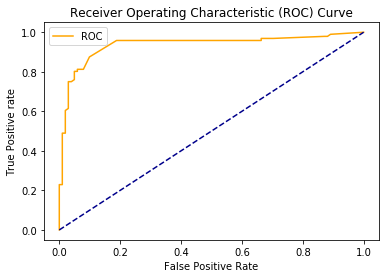

In [75]:
probs = lrmodel.predict_proba(x_test)
#finds the probability for each value in x_test
preds = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, preds)
plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
plt.plot([0, 1], [0, 1], color = 'darkblue', linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()